# Uvod u znanost o podacima - projekt

### Early Predictor for Student Success Based on Behavioural and Demographical Indicators

Literatura (članak): https://durham-repository.worktribe.com/OutputFile/1140733

Doria Herceg, 0036534753
 

### UVOD
Tema istraživanja je osmisliti model koji predviđa hoće li se neki student prijevremeno ispisati s fakulteta koji nastavu održava na daljinu, na temelju informacija o studentu. Podaci su prikupljani na najvećem sveučilištu koje prakticira nastavu na daljinu u Ujedinjenom Kraljevstvu s preko 250 000 upisanih studenata.

### Priprema i vizualizacija podataka
Napomena: podatke je potrebno preuzeti s poveznice https://analyse.kmi.open.ac.uk/open_dataset i sve ih zajedno spremiti u folder "raw data" kako bi se mogli ispravno učitati u bilježnicu

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
#učitavanje setova podataka
assessments = pd.read_csv("raw data/assessments.csv", sep=",")
courses = pd.read_csv("raw data/courses.csv", sep = ",")
student_assessment = pd.read_csv("raw data/studentAssessment.csv", sep = ",")
student_info = pd.read_csv("raw data/studentInfo.csv")
student_registration = pd.read_csv("raw data/studentRegistration.csv", sep = ",")
student_vle = pd.read_csv("raw data/studentVle.csv", sep = ",")
vle = pd.read_csv("raw data/vle.csv", sep = ",")

In [5]:
student_vle.head()

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


### Tablica 'courses'
U ovoj tablici opisani su dostupni predmeti na fakultetu.

Značajke koje opisuju predmete su: <br>
 a) 'code_module' - šifra predmeta <br>
 b) 'code_presentation' - šifra koja označava razdoblje izvođenja predmeta, na početku je godina izvođenja, a na kraju je oznaka B za ljetni semestar i J za zimski <br>
 c) 'module_presentation_length' - duljina izvođenja predmeta u danima <br>

In [6]:
print(courses.shape)
courses.head()

(22, 3)


,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


Tablica 'courses' ima 22 predmeta i svaki je opisan s 3 značajke navedene iznad.

In [7]:
# pregled koliko ima različitih vrijednosti svake značajke
courses.nunique()

code_module                   7
code_presentation             4
module_presentation_length    7
dtype: int64

In [8]:
courses

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240
5,BBB,2014B,234
6,CCC,2014J,269
7,CCC,2014B,241
8,DDD,2013J,261
9,DDD,2014J,262


Kako tablica nije prevelika možemo ju pregledati cijelu i vidjeti da nema nedostajućih vrijednosti.

In [9]:
courses.describe()

,module_presentation_length
count,22.000000
mean,255.545455
std,13.654677
min,234.000000
25%,241.000000
50%,261.500000
75%,268.000000
max,269.000000


'Module_presentation_length' je jedina značajka u ovoj tablici koja ima numeričke vrijednosti. Iz gornje deskriptivne statistike vidljivo je da predavanja traju prosječno 255 dana s odstupanjima od +/- 2 tjedna.

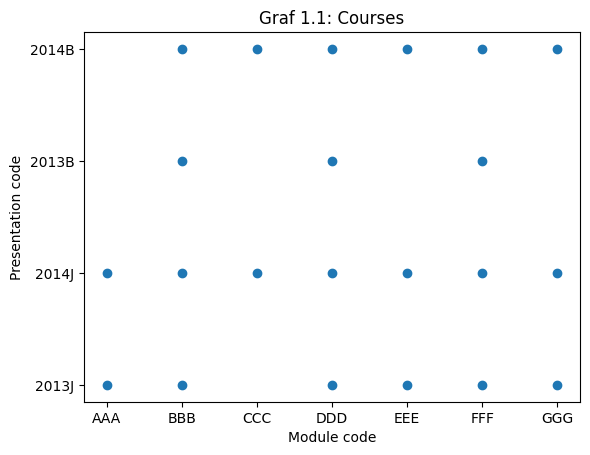

In [10]:
plt.scatter(courses.code_module, courses.code_presentation)
plt.title("Graf 1.1: Courses")
plt.xlabel("Module code")
plt.ylabel("Presentation code")
plt.show()

Iz gornjeg grafa 1.1 možemo vidjeti koji se predmeti održavaju koje godine i u kojem semestru. Naprimjer, predmeti 'BBB', 'DDD' i 'FFF' se održavaju obje godine i u ljetnom i u zimskom, dok se 'AAA' održavao samo u zimskom. Za predmete 'CCC', 'EEE' i 'GGG' možemo pretpostaviti da nedostaje informacija o održavanju predmeta u nekim semestrima pa po potrebi možemo npr. za ljetni semestar 2013 pretpostaviti da se održavao isto kao i ljetni semestar 2014.

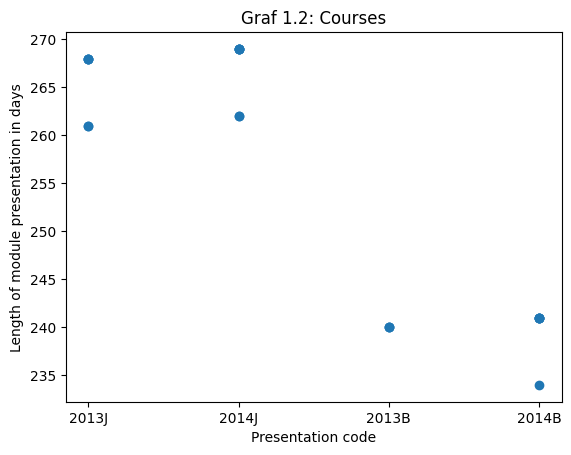

In [11]:
plt.scatter(courses.code_presentation, courses.module_presentation_length)
plt.title("Graf 1.2: Courses")
plt.xlabel("Presentation code")
plt.ylabel("Length of module presentation in days")
plt.show()

Iz grafa 1.2 možemo vidjeti da predmeti ljetnog semestra traju 20ak dana kraće od predmeta zimskog semestra. Također, možemo vidjeti i da gore izračunata srednja vrijednost nije prava vrijednost, već imamo dvije skupine predmeta koje imaju veću razliku u trajanju.

#### 2. Tablica 'Assessments'
Ovo je tablica koja opisuje zaduženja koja studenti imaju na svakom predmetu.

Ta zaduženja opisuju sljedeće značajke:

a) **'code_module'** -> šifra predmeta <br>
b) **'code_presentation'** -> šifra koja označava razdoblje izvođenja predmeta, na početku je godina izvođenja, a na kraju je oznaka B za ljetni semestar i J za zimski <br>
c) **'id_assessment'** -> identifikator zaduženja <br>
d) **'assessment_type'** -> tip zaduženja, moguće vrijednosti su TMA (Tutor Marked Assessment), CMA (Computer Marked Assessment) and Exam (Final exam) <br>
e) **'date'** -> broj dana od početka održavanja predmeta do roka za predaju zaduženja <br>
f) **'weight'** -> postotak koliko bodova nosi određen zadatak u odnosu na ukupan broj bodova na predmetu, izraženo u postotcima <br>

In [12]:
print(assessments.shape)
assessments.head()

(206, 6)


,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


Tablica assessments ima 206 primjeraka zaduženja i 6 značajki koje opisuju ta zaduženja. Potrebno je provjeriti postoje li monotone značajke. Tu je već moguće posumnjati na značajku 'id_assessment' jer su identifikatori čest primjer monotonih značajki kako je njihova jedina svrha prebrojavanje primjera i povezivanje tablica pa nam u analizi nije potreban.

In [13]:
assessments.nunique()

code_module            7
code_presentation      4
id_assessment        206
assessment_type        3
date                  74
weight                24
dtype: int64

Vidi se da je jednak broj različitih vrijednosti značajke 'id_assessments' kao i broj primjera pa je tu značajku moguće izbaciti.

In [14]:
assessments.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


Već je u gornjem ispisu vidljivo da nedostaju neke vrijednosti iz kolone 'date'. Treba provjeriti ima li još kolona s nedostajućim vrijednostima.

In [15]:
assessments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               195 non-null    float64
 5   weight             206 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.8+ KB


In [16]:
assessments.isna().sum()

code_module           0
code_presentation     0
id_assessment         0
assessment_type       0
date                 11
weight                0
dtype: int64

Postoji 11 primjera koji nemaju datum provjere. To je 8% od ukupnog primjerka pa je prije odluke što učiniti bitno još detaljnije pogledati podatke.

In [17]:
df_assessments = pd.DataFrame(assessments)
assessments_without_date = assessments[assessments['date'].isna()]
assessments_without_date

,code_module,code_presentation,id_assessment,assessment_type,date,weight
5,AAA,2013J,1757,Exam,NaN,100.0
11,AAA,2014J,1763,Exam,NaN,100.0
23,BBB,2013B,14990,Exam,NaN,100.0
35,BBB,2013J,15002,Exam,NaN,100.0
47,BBB,2014B,15014,Exam,NaN,100.0
53,BBB,2014J,15025,Exam,NaN,100.0
62,CCC,2014B,24290,Exam,NaN,100.0
63,CCC,2014B,40087,Exam,NaN,100.0
72,CCC,2014J,24299,Exam,NaN,100.0
73,CCC,2014J,40088,Exam,NaN,100.0


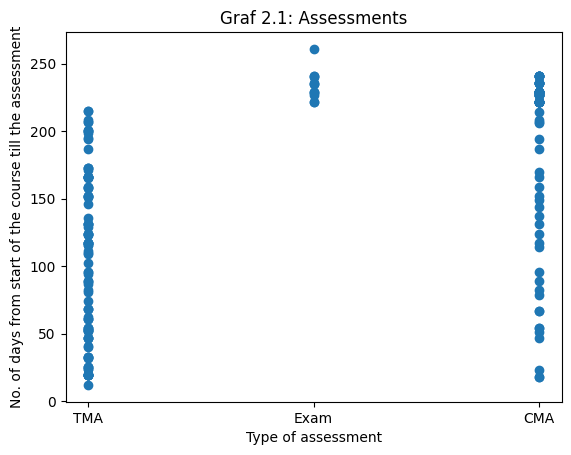

In [18]:
plt.scatter(assessments.assessment_type, assessments.date)
plt.title("Graf 2.1: Assessments")
plt.xlabel("Type of assessment")
plt.ylabel("No. of days from start of the course till the assessment")
plt.show()

Iz tablice dobivene filtriranjem tablice 'Assessments' tako da su vidljivi samo primjeri kojima nedostaje zapis datuma, vidljivo je da se radi samo o primjerima tipa 'Exam'. Također, na grafu koji prikazuje raspored težine zaduženja na predmetu prema tipu zaduženja vidimo da su sva zaduženja tipa 'Exam' u dosta bliskom periodu pa je moguće zaključiti da je u redu da se nedostajuće datume popuni sa srednjom vrijednošću svih datuma zaduženja tipa 'Exam'.

In [19]:
#deskriptivna statistika
assessments.describe()

,id_assessment,date,weight
count,206.000000,195.000000,206.000000
mean,26473.975728,145.005128,20.873786
std,10098.625521,76.001119,30.384224
min,1752.000000,12.000000,0.000000
25%,15023.250000,71.000000,0.000000
50%,25364.500000,152.000000,12.500000
75%,34891.750000,222.000000,24.250000
max,40088.000000,261.000000,100.000000


Treba provjeriti postoje li stršeće vrijednosti.

In [20]:
print('Date in <0, 50]: ', ((assessments.date > 0) & (assessments.date <= 50) ).sum())
print('Date in <50, 100]: ', ((assessments.date > 50) & (assessments.date <= 100)).sum())
print('Date in <100, 150]: ', ((assessments.date > 100) & (assessments.date <= 150)).sum())
print('Date in <150, 200]: ', ((assessments.date > 150 )& (assessments.date <= 200)).sum())
print('Date in <200, 261]: ', ((assessments.date > 200) & (assessments.date <= 261)).sum())


Date in <0, 50]:  29
Date in <50, 100]:  34
Date in <100, 150]:  30
Date in <150, 200]:  33
Date in <200, 261]:  69


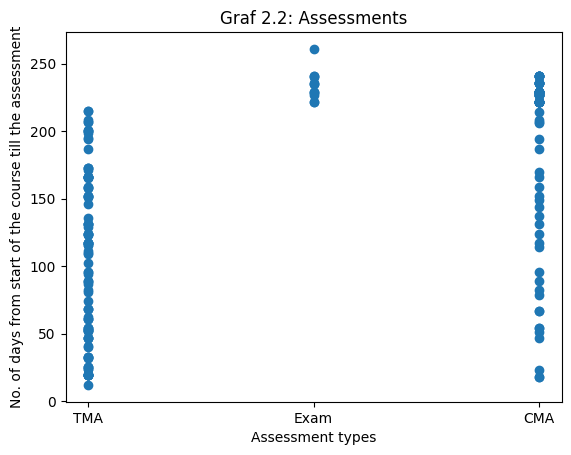

In [21]:
plt.scatter(assessments.assessment_type, assessments.date)
plt.title("Graf 2.2: Assessments")
plt.xlabel("Assessment types")
plt.ylabel("No. of days from start of the course till the assessment")
plt.show()

Iz gornjeg ispisa i grafa vidljivo je da u koloni 'date' nema stršećih vrijednosti.

In [22]:
print('Weight in <0, 20]: ', ((assessments.weight > 0) & (assessments.weight <= 20) ).sum())
print('Weight in <20, 40]: ', ((assessments.weight > 20) & (assessments.weight <= 40)).sum())
print('Weight in <40, 60]: ', ((assessments.weight > 40) & (assessments.weight <= 60)).sum())
print('Weight in <60, 80]: ', ((assessments.weight > 60 )& (assessments.weight <= 80)).sum())
print('Weight in <80, 100]: ', ((assessments.weight > 80) & (assessments.weight <= 100)).sum())

Weight in <0, 20]:  92
Weight in <20, 40]:  34
Weight in <40, 60]:  0
Weight in <60, 80]:  0
Weight in <80, 100]:  24


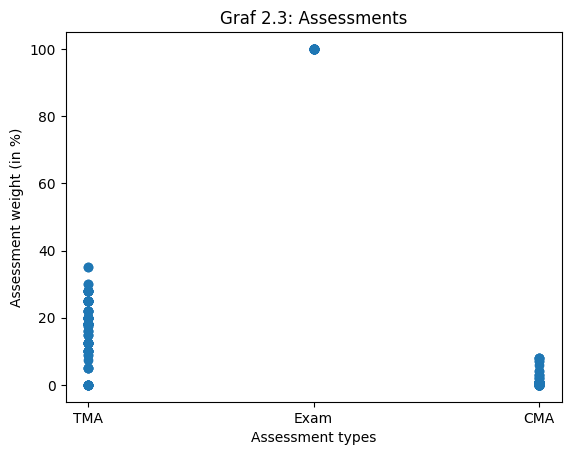

In [23]:
plt.scatter(assessments.assessment_type, assessments.weight)
plt.title("Graf 2.3: Assessments")
plt.xlabel("Assessment types")
plt.ylabel("Assessment weight (in %)")
plt.show()

Iz gornjeg ispisa i grafa vidljivo je da u koloni 'date' nema značajno stršećih vrijednosti.

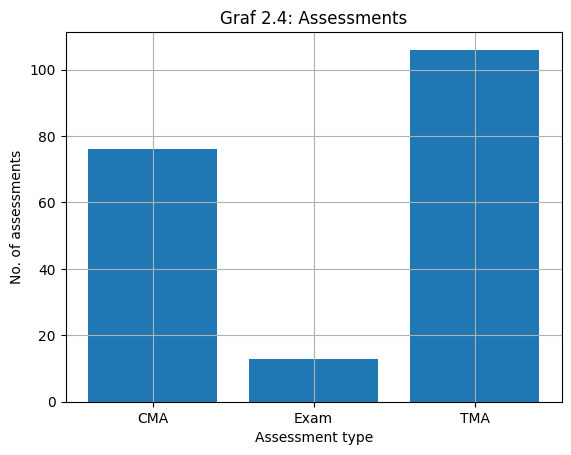

In [24]:
count_per_type = assessments.groupby('assessment_type').count().loc[:,'date'].values
assessment_types = assessments.groupby('assessment_type').count().index.values

plt.grid()
plt.bar(assessment_types, count_per_type)
plt.title("Graf 2.4: Assessments")
plt.xlabel("Assessment type")
plt.ylabel("No. of assessments")
plt.show()

Graf 2.4 pokazuje koliko ima zaduženja iz svake kategorije.

#### 3. Tablica 'Vle'
Ova tablica je popis svih dostupnih materijala za svaki predmet na VLE platformi (Virtual Learning Environment).<br>

Materijale opisuju sljedeće značajke: <br>

a) *id_site* -> identifikator materijala <br>
b) *'code_module'* - šifra predmeta <br>
c) *'code_presentation'* - šifra koja označava razdoblje izvođenja predmeta, na početku je godina izvođenja, a na kraju je oznaka B za ljetni semestar i J za zimski <br>
d) *'activity_type'* - vrsta materijala
e) *'week_from'* - broj tjedna u kojem bi studenti trebali početi korisititi materijal
f) *'week_to'* - broj tjedna u kojem bi studenti trebali završiti s korištenjem materijal

In [25]:
print(vle.shape)
vle.head()

(6364, 6)


,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN


In [26]:
vle.nunique()

id_site              6364
code_module             7
code_presentation       4
activity_type          20
week_from              30
week_to                30
dtype: int64

Opet je opravdano obrisati identifikator tablice, odnosno u ovom slučaju kolonu 'id_site' (monotona varijabla), međutim dobro ju je i ostaviti u datasetu jer je potrebna kod operacija prebrojavanja.

In [27]:
vle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_site            6364 non-null   int64  
 1   code_module        6364 non-null   object 
 2   code_presentation  6364 non-null   object 
 3   activity_type      6364 non-null   object 
 4   week_from          1121 non-null   float64
 5   week_to            1121 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 298.4+ KB


Od početka je vidljivo da nedostaje puno podataka za značajke 'week_from' i 'week_to'. Međutim, ima previše poznatih vrijednosti da bismo mogli izbaciti te značajke te previše nepoznatih vrijednosti da bismo mogli izbaciti primjere.

In [28]:
vle.describe()

,id_site,week_from,week_to
count,6.364000e+03,1121.000000,1121.000000
mean,7.260991e+05,15.204282,15.214987
std,1.283151e+05,8.792865,8.779806
min,5.267210e+05,0.000000,0.000000
25%,6.615928e+05,8.000000,8.000000
50%,7.300965e+05,15.000000,15.000000
75%,8.140162e+05,22.000000,22.000000
max,1.077905e+06,29.000000,29.000000


In [29]:
#filter vle.week_from so that there is no nan values
vle_without_empty_week_values = vle[~vle['week_from'].isna()]
vle_without_empty_week_values = vle_without_empty_week_values[~vle_without_empty_week_values['week_to'].isna()]

vle_only_empty_week_values = vle[vle['week_from'].isna()]
vle_only_empty_week_values = vle_only_empty_week_values[vle_only_empty_week_values['week_to'].isna()]


In [30]:
vle_only_empty_week_values

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN
...,...,...,...,...,...,...
6359,897063,GGG,2014J,resource,NaN,NaN
6360,897109,GGG,2014J,resource,NaN,NaN
6361,896965,GGG,2014J,oucontent,NaN,NaN
6362,897060,GGG,2014J,resource,NaN,NaN


In [31]:
#count how many of each code_module there is
count_per_module_without_empty_week_values = vle_without_empty_week_values.groupby('code_module').count().loc[:,'id_site'].values
count_per_module_without_empty_week_values

array([  6, 186,  10,   2,  79, 826,  12])

In [32]:
#count how many of each code_module there is in the dataset without id_site
count_per_module2 = vle.groupby('code_module').count().loc[:,'id_site'].values
count_per_module2

array([ 413, 1154,  419, 1708,  336, 1967,  367])

In [33]:
for i in range (0, len(count_per_module_without_empty_week_values)):
    print(vle.code_module.unique()[i] +  "->" + (count_per_module_without_empty_week_values[i]/count_per_module2[i]).astype(str))

AAA->0.014527845036319613
BBB->0.1611785095320624
CCC->0.02386634844868735
DDD->0.00117096018735363
EEE->0.23511904761904762
FFF->0.4199288256227758
GGG->0.0326975476839237


U gornjem ispisu možemo vidjeti koliki bi se postotak zapisa o kojem predmetu izgubio kada bismo obrisali značajke 'week_from' and 'week-to'. <br>
Ne možemo izbrisati značajke, a ne možemo ni obrisati zapise bez podataka o tim značajkama. Jedino što preostaje je popuniti te informacije, a to bi se moglo tako da, ako primjerice nedostaju podaci za predmet 'AAA' u ljetnom semestru 2013., mogli bismo ih uzeti iz 'AAA' u ljetnom semestru 2014.
Ne smatram da bi to u ukupnom  pogledu na podatke značajno pridonijelo pa sam odlučila podatke samo ostaviti kakvi jesu.

#### 4. Tablica studentInfo.csv
Ova tablica sadrži demografske podatke o studentima te njihovim rezultatima na studiju. <br>

Značajke ove tablice su: <br>

a) *code_module* - šifra predmeta kojeg student polaže <br>
b) *code_presentation* - šifra koja označava razdoblje u kojem student pohađa predmet, na početku je godina izvođenja, a na kraju je oznaka B za ljetni semestar i J za zimski <br>
c) *id_student* - identifikator studenta <br>
d) *gender* – spol studenta<br>
e) *region* – mjesto stanovanja studenta za vrijeme polaganja predmeta<br>
f) *highest_education* – najviše položen stupanj obrazovanja u trenutku upisivanja predmeta<br>
g) *imd_band* – indeks stupnja siromaštva mjesta stanovanja studenta u trenutku polaganja predmeta<br>
h) *age_band* – dobna skupina kojoj student pripada<br>
i) *num_of_prev_attempts* – broj pokušaja polaganja predmeta<br>
j) *studied_credits* – broj bodova (npr. ECTS-a) koje je student položio<br>
k) *disability* – označava ima li student neku teškoću u razvoju<br>
l) *final_result* – status studenta na kraju semestra (prolaz/pad/ispisao predmet/prolaz s pohvalom)<br>

In [34]:
print(student_info.shape)
student_info.head()

(32593, 12)


,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [35]:
student_info.nunique()

code_module                 7
code_presentation           4
id_student              28785
gender                      2
region                     13
highest_education           5
imd_band                   10
age_band                    3
num_of_prev_attempts        7
studied_credits            61
disability                  2
final_result                4
dtype: int64

U nekim slučajevima valja obrisati kolonu s primarnim identifikatorom, međutim ovdje značajku 'student_id' ne treba brisati jer to nije jedinstveni identifikator zbog toga što je moguće da je isti student upisao više predmeta pa je isti identifikator zapisan više puta.

In [36]:
student_info.isna().sum()

code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                1111
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64

Jedina značajka kojoj nedostaju podatci je značajka 'IMD_Band'. U slučaju da se ti podaci pokažu potrebnima u analizi, vjerojatno bi se vrijednosti mogle pronaći iz podataka u regiji u kojoj je student živio i godine u kojoj je polagao predmet. Za sad ćemo tu kolonu zanemariti.

Percentage of male students: 54.84%
Percentage of female students: 45.16%


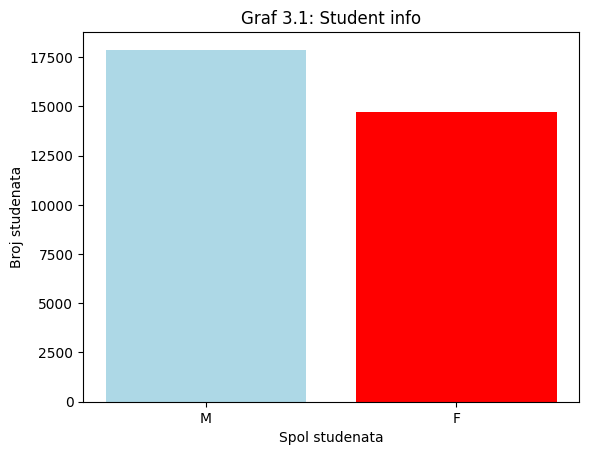

In [37]:
male = (student_info.gender == 'M').sum()
female = (student_info.gender == 'F').sum()

count_genders = {}
for gender in (student_info.gender.unique()):
    count_genders.update({gender: (student_info.gender == gender).sum()})

print("Percentage of male students: {:.2f}%".format((male/(male + female)*100)))
print("Percentage of female students: {:.2f}%".format((female/(male + female)*100)))


#bar chart representing number of students per gender
plt.bar(count_genders.keys(), count_genders.values(), color = ['lightblue', 'red'])
plt.xlabel("Spol studenata")
plt.ylabel("Broj studenata")
plt.title("Graf 3.1: Student info")
plt.show()

Vidljivo je da je predmete polaže malo više muškaraca nego žena.

In [38]:
student_info.describe()

,id_student,num_of_prev_attempts,studied_credits
count,3.259300e+04,32593.000000,32593.000000
mean,7.066877e+05,0.163225,79.758691
std,5.491673e+05,0.479758,41.071900
min,3.733000e+03,0.000000,30.000000
25%,5.085730e+05,0.000000,60.000000
50%,5.903100e+05,0.000000,60.000000
75%,6.444530e+05,0.000000,120.000000
max,2.716795e+06,6.000000,655.000000


Ovaj ispis deskriptivne statistike opisuje 3 numeričke varijable. Identifikator nema razloga proučavati jer ne pokazuje nikakvu veličinu, dok za druge dvije značajke valja provjeriti postoji li stršećih vrijednosti. Najbolje vizualizacijom. 

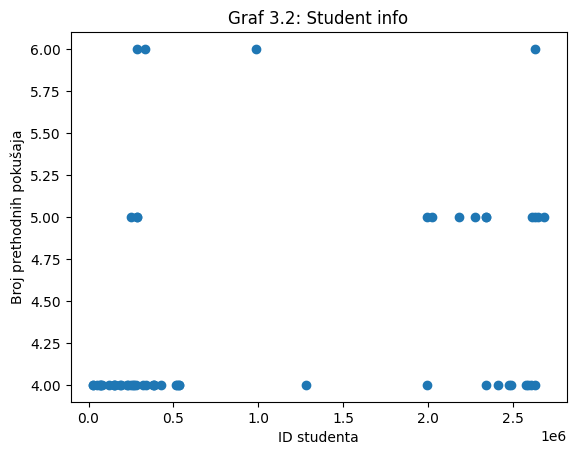

In [39]:
#show number of previous attempts for each student that has more than 3 previous attempts
plt.scatter(student_info[student_info.num_of_prev_attempts > 3].id_student, student_info[student_info.num_of_prev_attempts > 3].num_of_prev_attempts)
plt.xlabel("ID studenta")
plt.ylabel("Broj prethodnih pokušaja")
plt.title("Graf 3.2: Student info")
plt.show()

U gornjem grafu (Graf 3.2) vidljivo je da su samo 4 studenta predmet upisivala 6 puta. To bi mogla biti greška odnosno stršeći podatak, a mogla bi biti i posljedica prirodnog događaja pa samo činjenica da ti podaci odskaču od ostalih nije dovoljno jak argument za izbacivanje tih podataka.

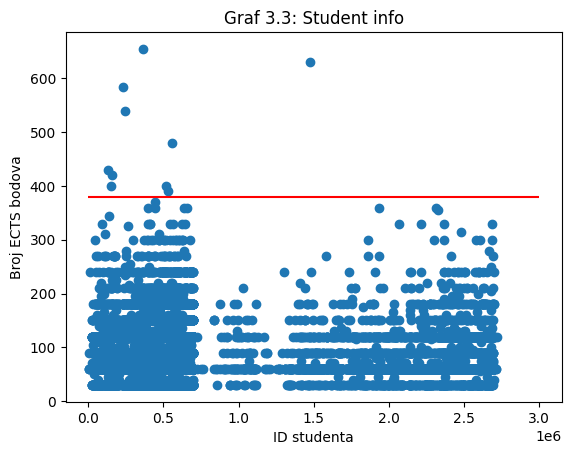

In [40]:
plt.scatter(student_info.id_student, student_info.studied_credits)
plt.xlabel("ID studenta")
plt.ylabel("Broj ECTS bodova")
plt.title("Graf 3.3: Student info")
plt.hlines(xmin = 0, xmax = 3000000, y = 380, linestyles = "solid", colors = "red")
plt.show()

Sudeći prema grafu 3.3, opravdano je izbaciti sve zapise koji imaju vrijednost dosad položenih ECTS bodova više od 450.
Također, treba zapamtiti sve vrijednosti značajke 'student_id' za zapise koje izbacujemo kako bismo ih mogli izbaciti i iz drugih tablica u kojima se spominju.

In [41]:
#delete records with studied credits > 450 and print their student id
students_to_delete = student_info[student_info.studied_credits > 380]

In [42]:
student_info = student_info[~student_info.id_student.isin(students_to_delete.id_student)]
student_info.describe()

,id_student,num_of_prev_attempts,studied_credits
count,3.258100e+04,32581.000000,32581.000000
mean,7.067820e+05,0.163163,79.625395
std,5.492057e+05,0.479686,40.390191
min,3.733000e+03,0.000000,30.000000
25%,5.086150e+05,0.000000,60.000000
50%,5.903600e+05,0.000000,60.000000
75%,6.444700e+05,0.000000,120.000000
max,2.716795e+06,6.000000,370.000000


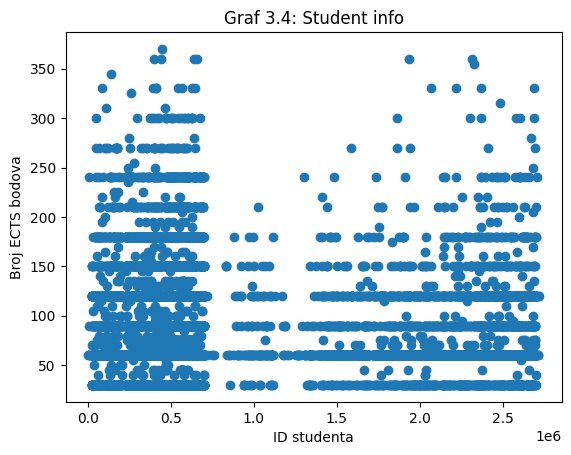

In [43]:
plt.scatter(student_info.id_student, student_info.studied_credits)
plt.xlabel("ID studenta")
plt.ylabel("Broj ECTS bodova")
plt.title("Graf 3.4: Student info")
plt.show()

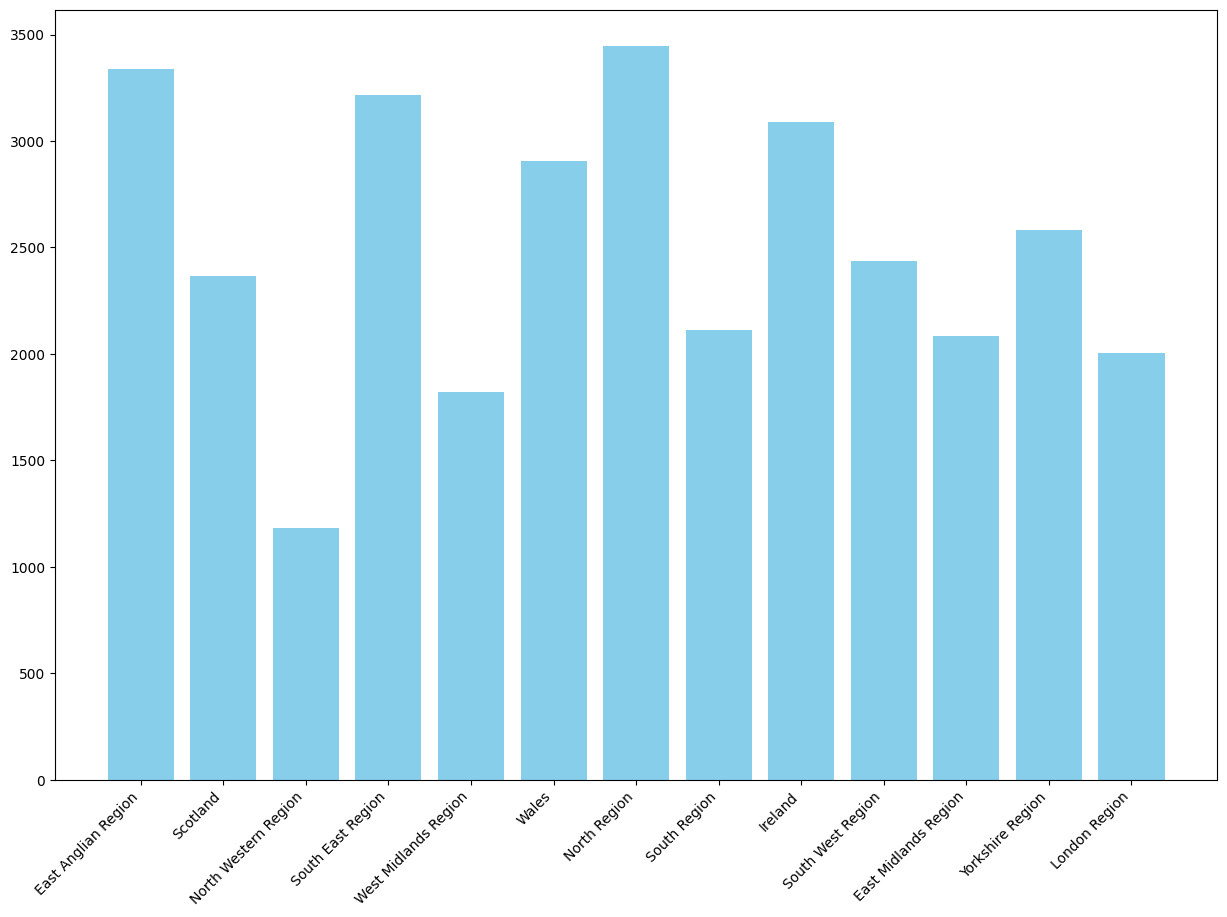

In [44]:
#count how many students are in each region
count_per_region = student_info.groupby('region').count().loc[:,'id_student'].values
count_per_region
#bar chart with numbers of students per region
figure = plt.figure(figsize=(15, 10))
plt.bar(student_info.region.unique(), count_per_region, color = "skyblue")
plt.xticks(rotation=45, ha='right')
plt.show()

Još jedan zanimljiv prikaz je graf podjele studenata po regijama. Vidljivo je da su manje-više sve jednako zastupljene.

# 2. REPLIKACIJA REZULTATA

Problem je klasifikaciji - pokušava unaprijed identificirati studente koji bi mogli pasti studij ili odustati od njega. Cilj je te studente unaprijed upozoriti. U pitanju je multivarijantna klasifikacija jer su oznake iz skupa {Odustao/la, Pad, Prolaz, Izvrsni prolaz}.

In [45]:
student_info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32581 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32581 non-null  object
 1   code_presentation     32581 non-null  object
 2   id_student            32581 non-null  int64 
 3   gender                32581 non-null  object
 4   region                32581 non-null  object
 5   highest_education     32581 non-null  object
 6   imd_band              31471 non-null  object
 7   age_band              32581 non-null  object
 8   num_of_prev_attempts  32581 non-null  int64 
 9   studied_credits       32581 non-null  int64 
 10  disability            32581 non-null  object
 11  final_result          32581 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.2+ MB


In [46]:
student_info.nunique()

code_module                 7
code_presentation           4
id_student              28775
gender                      2
region                     13
highest_education           5
imd_band                   10
age_band                    3
num_of_prev_attempts        7
studied_credits            52
disability                  2
final_result                4
dtype: int64

In [47]:
student_info.isna().sum()

code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                1110
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64

U istraživanju je sudjelovalo 32593 studenata, od njih 55% muškaraca i 45% žena. Pohađali su 7 različitih predmeta preko platforme Virtual Learning Environment (VLE).

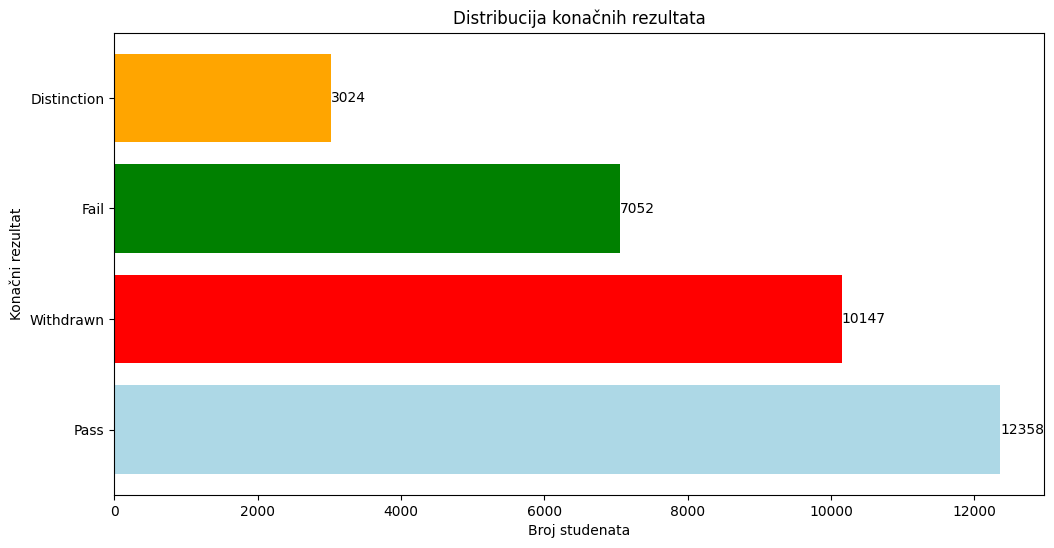

In [48]:
plt.figure(figsize=(12, 6))
bars = plt.barh(student_info.final_result.unique(), student_info['final_result'].value_counts().values, color = ['lightblue', 'red', 'green', 'orange'])
plt.xlabel("Broj studenata")
plt.ylabel("Konačni rezultat")
for bar in bars:
    xval = bar.get_width()
    plt.text(xval, bar.get_y() + bar.get_height()/2, f'{xval}', ha='left', va='center')

plt.title("Distribucija konačnih rezultata")
plt.show()

In [49]:
student_vle.head()

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


In [50]:
no_of_registered_students = student_info.groupby('code_module')['id_student'].count()


In [51]:
print(no_of_registered_students)

code_module
AAA     747
BBB    7905
CCC    4431
DDD    6270
EEE    2934
FFF    7760
GGG    2534
Name: id_student, dtype: int64


In [52]:
vle.head()

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN


In [53]:
assessments.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


In [54]:
earliest_assessment_dates = assessments.groupby('code_module')['date'].min()
print(earliest_assessment_dates)


code_module
AAA    19.0
BBB    12.0
CCC    18.0
DDD    20.0
EEE    33.0
FFF    19.0
GGG    61.0
Name: date, dtype: float64


In [55]:
code_module_runs = courses.groupby('code_module')['code_presentation'].unique()

In [56]:
print(code_module_runs)

code_module
AAA                  [2013J, 2014J]
BBB    [2013J, 2014J, 2013B, 2014B]
CCC                  [2014J, 2014B]
DDD    [2013J, 2014J, 2013B, 2014B]
EEE           [2013J, 2014J, 2014B]
FFF    [2013J, 2014J, 2013B, 2014B]
GGG           [2013J, 2014J, 2014B]
Name: code_presentation, dtype: object


In [57]:
for i in range(7):
    code_module_runs[i] = "2013 & 2014"
code_module_runs[2] = "2014"

In [58]:
mooc_info = pd.merge(pd.merge(earliest_assessment_dates, no_of_registered_students, on='code_module'), code_module_runs, on='code_module')
mooc_info = mooc_info.rename(columns={'code_module': 'course'})

for i in range(7):
    mooc_info.date[i] = "Day " + str(round(mooc_info.date[i]))


In [59]:
print(mooc_info)

               date  id_student code_presentation
code_module                                      
AAA          Day 19         747       2013 & 2014
BBB          Day 12        7905       2013 & 2014
CCC          Day 18        4431              2014
DDD          Day 20        6270       2013 & 2014
EEE          Day 33        2934       2013 & 2014
FFF          Day 19        7760       2013 & 2014
GGG          Day 61        2534       2013 & 2014


In [60]:
student_vle.head()

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


• **First Assignment Mark:** Ocjena studenta na prvom zadatku iz predmeta, značajka "score" u datoteci StudentsAssessments.csv.

• **Educational Level:** Najviša razina obrazovanja studenta prije upisivanja ovog studija. To je značajka "highest_education" u datoteci "StudentInfo.csv", 4 vrijednosti te značajke su: "Lower than A level", "A level or equivalent", "HE Qualification" i "Post Graduate Qualification".

• **Clicks till Course Starts:** Broj klikova koje je student napravio prije početka predmeta. To je značajka "sum_click" u datoteci "StudentVle.csv".

• **Registration Date:** Broj dana od početka predavanja do registracije studenta. To je značajka "date_registration" u datoteci "StudentRegistration.csv".

• **Age:** Raspon godina u kojemu se student nalazi. To je značajka "age_band" i moguće vrijednosti te značajke su 0-35, 35-55, >55. Ta značajka se nalazi u datoteci "StudentInfo.csv".

• **Disability:** Informacija o tome ima li student neku poteškoću. Navedeno u datoteci "StudentInfo.csv" pod imenom "disability".

• **Gender:** Spol studenta, zapisano u datoteci "StudentInfo.csv" pod imenom "gender".

• **Previous Attempts:** Broj puta koliko je student pao određeni predmet. Zapisano u značajki "num_of_pred_attempts" u datoteci "StudentInfo.csv".

In [61]:
import scipy.stats

Pearsonov chi-kvadrat test je statistički test koji provjerava ovisnost dviju varijabli. Nulta pretpostavka je da su varijable nezavisne, a ako je p-vrijednost dovoljno mala (manja od 0.05), onda možemo odbaciti tu pretpostavku i zaključiti da postoji veza među njima.

In [62]:
def chi2_test(table, variable_name):
    stat, p, dof, expected = scipy.stats.chi2_contingency(table)

    print(f"Chi-squared test for {variable_name}:")
    print(f"  p-value = {p}")
    print("\n")

In [63]:
student_info['highest_education'].isna().sum()

0

In [64]:
contingency_table_education = pd.crosstab(student_info['highest_education'], student_info['final_result'])
contingency_table_age = pd.crosstab(student_info['age_band'], student_info['final_result'])
contingency_table_gender = pd.crosstab(student_info['gender'], student_info['final_result'])
contingency_table_disability = pd.crosstab(student_info['disability'], student_info['final_result'])


In [65]:
chi2_test(contingency_table_education, "Highest education")
chi2_test(contingency_table_age, "Age")
chi2_test(contingency_table_gender, "Gender")
chi2_test(contingency_table_disability, "Disability")

Chi-squared test for Highest education:
  p-value = 1.9711654049219626e-211


Chi-squared test for Age:
  p-value = 2.980324895746476e-45


Chi-squared test for Gender:
  p-value = 0.0008042859487564865


Chi-squared test for Disability:
  p-value = 6.949509054380835e-30




Možemo vidjeti da su p-vrijednosti za sve varijable značajno manje od 0.05 pa zaključujem da o svima njima ovisi izlazna vrijednost.

Kako bismo vidjeli međusobnu ovisnost značajki, provodimo Pearsonov korelacijski test.

In [66]:
student_info['highest_education'].unique()

array(['HE Qualification', 'A Level or Equivalent', 'Lower Than A Level',
       'Post Graduate Qualification', 'No Formal quals'], dtype=object)

In [67]:
student_info['gender'] = student_info['gender'].map({'F': 0.0, 'M': 1.0})
student_info['highest_education'] = student_info['highest_education'].map({'HE Qualification': 0.0, 'Lower Than A Level': 1.0, 'A Level or Equivalent': 2.0, 'Post Graduate Qualification': 3.0, 'No Formal quals': 4.0})
student_info['age_band'] = student_info['age_band'].map({'0-35': 0.0, "35-55": 1.0, "55<=": 2.0})
student_info['disability'] = student_info['disability'].map({'N': 0, 'Y': 1.0})

In [68]:
student_vle.nunique()

code_module              7
code_presentation        4
id_student           26074
id_site               6268
date                   295
sum_click              498
dtype: int64

In [69]:
student_assessment_avg = student_assessment.groupby('id_student')['score'].mean().reset_index()

student_vle_total = student_vle[student_vle['date'] < 0].groupby('id_student')['sum_click'].sum().reset_index()

In [70]:
missing_student_ids = set(student_vle['id_student']) - set(student_vle_total['id_student'])
missing_students = pd.DataFrame({'id_student': list(missing_student_ids), 'sum_click': 0})
student_vle_total = pd.concat([student_vle_total, missing_students], ignore_index=True)
student_vle_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26074 entries, 0 to 26073
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   id_student  26074 non-null  int64
 1   sum_click   26074 non-null  int64
dtypes: int64(2)
memory usage: 407.5 KB


In [71]:
merged_data = student_info.merge(student_assessment_avg, on='id_student', how='left')
merged_data = merged_data[~merged_data.score.isna()]

merged_data = merged_data.merge(student_vle_total, on='id_student', how='left')
merged_data = merged_data[~merged_data.sum_click.isna()]

merged_data = merged_data.merge(student_registration[['id_student', 'date_registration']], on='id_student', how='left')
merged_data = merged_data[~merged_data.date_registration.isna()]

merged_data['registration_date_numeric'] = pd.to_numeric(merged_data['date_registration'], errors='coerce')


In [72]:
merged_data.isna().sum()

code_module                     0
code_presentation               0
id_student                      0
gender                          0
region                          0
highest_education               0
imd_band                     1286
age_band                        0
num_of_prev_attempts            0
studied_credits                 0
disability                      0
final_result                    0
score                           0
sum_click                       0
date_registration               0
registration_date_numeric       0
dtype: int64

In [73]:
znacajke = merged_data[['gender', 'highest_education', 'age_band', 'num_of_prev_attempts', 'disability', 'score', 'date_registration', 'sum_click']]
corr_matrix = znacajke.corr(method='pearson')

print(corr_matrix)

                        gender  highest_education  age_band  \
gender                1.000000          -0.026548 -0.025443   
highest_education    -0.026548           1.000000 -0.128950   
age_band             -0.025443          -0.128950  1.000000   
num_of_prev_attempts -0.031521           0.007626  0.015983   
disability           -0.048859           0.026174 -0.026325   
score                -0.009976          -0.002292  0.078674   
date_registration    -0.021514          -0.024789  0.020978   
sum_click             0.091156          -0.022030  0.120706   

                      num_of_prev_attempts  disability     score  \
gender                           -0.031521   -0.048859 -0.009976   
highest_education                 0.007626    0.026174 -0.002292   
age_band                          0.015983   -0.026325  0.078674   
num_of_prev_attempts              1.000000    0.078798 -0.094830   
disability                        0.078798    1.000000 -0.059452   
score                   

In [74]:
import numpy as np

# Extract the lower triangular part of the correlation matrix
lower_triangular = np.tril(corr_matrix)

# Print the lower triangular matrix
for i in  range (len(lower_triangular)):
    for j in range (i+1):
        print(round(lower_triangular[i][j], 2), end=" ")
    print()



1.0 
-0.03 1.0 
-0.03 -0.13 1.0 
-0.03 0.01 0.02 1.0 
-0.05 0.03 -0.03 0.08 1.0 
-0.01 -0.0 0.08 -0.09 -0.06 1.0 
-0.02 -0.02 0.02 -0.03 -0.01 0.02 1.0 
0.09 -0.02 0.12 -0.01 0.02 0.16 -0.1 1.0 


Iz gornjeg ispisa možemo vidjeti da varijable jako jako malo međusobno koreliraju pa to znači da možemo koristiti robusnije i algoritme boljih performansi na ovim podacima.
Varijable koje ćemo koristiti u predikciji krajnjeg rezultata studenata su: *First Assignment Mark, Educational Level, Clicks till Course Starts, Registration date, Age, and Gender*.
70% podataka koristimo za treniranje, a 30% za testiranje modela.

In [75]:
merged_data.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,score,sum_click,date_registration,registration_date_numeric
0,AAA,2013J,11391,1.0,East Anglian Region,0.0,90-100%,2.0,0,240,0.0,Pass,82.0,98.0,-159.0,-159.0
1,AAA,2013J,28400,0.0,Scotland,0.0,20-30%,1.0,0,60,0.0,Pass,66.4,215.0,-53.0,-53.0
2,AAA,2013J,31604,0.0,South East Region,2.0,50-60%,1.0,0,60,0.0,Pass,76.0,169.0,-52.0,-52.0
3,AAA,2013J,32885,0.0,West Midlands Region,1.0,50-60%,0.0,0,60,0.0,Pass,54.4,295.0,-176.0,-176.0
4,AAA,2013J,38053,1.0,Wales,2.0,80-90%,1.0,0,60,0.0,Pass,68.0,277.0,-110.0,-110.0


## 1. STABLO ODLUKE

In [76]:
sorted_data = student_assessment.sort_values(by='date_submitted')
first_assignment_marks = sorted_data.groupby('id_student').first().reset_index()
#drop rows with nan values
first_assignment_marks = first_assignment_marks[~first_assignment_marks.score.isna()]
first_assignment_marks.rename(columns={'score': 'first_assignment_mark'}, inplace=True)

In [77]:
first_assignment_marks

,id_student,id_assessment,date_submitted,is_banked,first_assignment_mark
0,6516,1758,17,0,60.0
1,8462,25362,-1,1,93.0
2,11391,1752,18,0,78.0
3,23629,14984,9,0,67.0
4,23698,24295,21,0,78.0
...,...,...,...,...,...
23364,2698251,25355,15,0,69.0
23365,2698257,1752,22,0,58.0
23366,2698535,24286,20,0,20.0
23367,2698577,15020,19,0,100.0


In [78]:
first_assignment_marks = pd.merge(first_assignment_marks, assessments[['id_assessment', 'code_module', 'code_presentation']], on='id_assessment', how='left')

In [79]:
first_assignment_marks

,id_student,id_assessment,date_submitted,is_banked,first_assignment_mark,code_module,code_presentation
0,6516,1758,17,0,60.0,AAA,2014J
1,8462,25362,-1,1,93.0,DDD,2014J
2,11391,1752,18,0,78.0,AAA,2013J
3,23629,14984,9,0,67.0,BBB,2013B
4,23698,24295,21,0,78.0,CCC,2014J
...,...,...,...,...,...,...,...
23346,2698251,25355,15,0,69.0,DDD,2014B
23347,2698257,1752,22,0,58.0,AAA,2013J
23348,2698535,24286,20,0,20.0,CCC,2014B
23349,2698577,15020,19,0,100.0,BBB,2014J


In [80]:
merged_data

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,score,sum_click,date_registration,registration_date_numeric
0,AAA,2013J,11391,1.0,East Anglian Region,0.0,90-100%,2.0,0,240,0.0,Pass,82.000000,98.0,-159.0,-159.0
1,AAA,2013J,28400,0.0,Scotland,0.0,20-30%,1.0,0,60,0.0,Pass,66.400000,215.0,-53.0,-53.0
2,AAA,2013J,31604,0.0,South East Region,2.0,50-60%,1.0,0,60,0.0,Pass,76.000000,169.0,-52.0,-52.0
3,AAA,2013J,32885,0.0,West Midlands Region,1.0,50-60%,0.0,0,60,0.0,Pass,54.400000,295.0,-176.0,-176.0
4,AAA,2013J,38053,1.0,Wales,2.0,80-90%,1.0,0,60,0.0,Pass,68.000000,277.0,-110.0,-110.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33974,GGG,2014J,2620947,0.0,Scotland,2.0,80-90%,0.0,0,30,1.0,Distinction,88.888889,7.0,-23.0,-23.0
33975,GGG,2014J,2645731,0.0,East Anglian Region,1.0,40-50%,1.0,0,30,0.0,Distinction,88.111111,0.0,-23.0,-23.0
33976,GGG,2014J,2648187,0.0,South Region,2.0,20-30%,0.0,0,30,1.0,Pass,76.666667,15.0,-129.0,-129.0
33977,GGG,2014J,2679821,0.0,South East Region,1.0,90-100%,1.0,0,30,0.0,Withdrawn,91.500000,65.0,-49.0,-49.0


In [81]:


combined_df = pd.merge(merged_data, first_assignment_marks[['id_student', 'code_module', 'code_presentation', 'first_assignment_mark']], 
                       on=['id_student', 'code_module', 'code_presentation'], how='inner')

In [82]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

X = combined_df[['score', 'highest_education', 'sum_click', 'date_registration', 'age_band', 'gender', 'first_assignment_mark']]
y = pd.get_dummies(combined_df['final_result'])

X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(X, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier()

clf.fit(X_train_tree, y_train_tree)

y_pred = clf.predict(X_test_tree)
y_values = ["Withdrawn", "Fail", "Pass", "Distinction"]

for i, class_label in enumerate(y_values):
    print("Class: ", class_label)
    print("Precision:", precision_score(y_test_tree[class_label], y_pred[:, i], average='weighted'))
    print("F1:", f1_score(y_test_tree[class_label], y_pred[:, i], average='weighted'))
    print("Recall:", recall_score(y_test_tree[class_label], y_pred[:, i], average='weighted'))
    print("Accuracy:", accuracy_score(y_test_tree[class_label], y_pred[:, i]))
    print()


Class:  Withdrawn
Precision: 0.6721111352063468
F1: 0.6966143884064886
Recall: 0.7248657424753341
Accuracy: 0.7248657424753341

Class:  Fail
Precision: 0.7377234273184513
F1: 0.7367741907421833
Recall: 0.7358561258898464
Accuracy: 0.7358561258898464

Class:  Pass
Precision: 0.6523019838807109
F1: 0.652243852756206
Recall: 0.6528037966779068
Accuracy: 0.6528037966779068

Class:  Distinction
Precision: 0.7760006212589179
F1: 0.7369014550600389
Recall: 0.7032596478081679
Accuracy: 0.7032596478081679



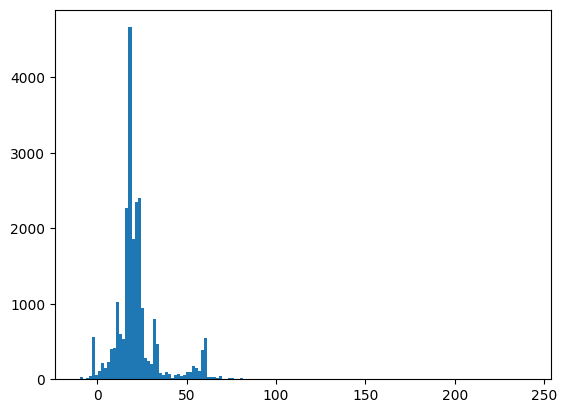

In [83]:
plt.hist(first_assignment_marks["date_submitted"], bins=150)
plt.show()

# 2. Random forest

In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier


In [85]:
X = combined_df[['score', 'highest_education', 'sum_click', 'date_registration', 'age_band', 'gender', 'first_assignment_mark']]
y = pd.get_dummies(combined_df['final_result'])
X_train_forest, X_test_forest, y_train_forest, y_test_forest = train_test_split(X, y, test_size=0.3, random_state=42)

In [86]:
X_train_forest.head()

,score,highest_education,sum_click,date_registration,age_band,gender,first_assignment_mark
15331,47.000000,2.0,44.0,-142.0,1.0,0.0,60.0
6535,66.250000,2.0,46.0,-37.0,0.0,0.0,100.0
19402,89.352941,0.0,377.0,-103.0,0.0,1.0,92.0
24831,84.500000,1.0,69.0,-67.0,1.0,0.0,40.0
293,56.000000,0.0,17.0,-11.0,2.0,1.0,62.0


In [87]:
#Random Forest
rf_clf = RandomForestClassifier()

rf_clf.fit(X_train_forest, y_train_forest, sample_weight=43)

y_pred_rf = rf_clf.predict(X_test_forest)

print("Random Forest Results")
print()
for i, class_label in enumerate(y_values):
    print("Class: ", class_label)
    print("Precision:", precision_score(y_test_forest[class_label], y_pred[:, i], average='weighted', zero_division=0).round(2))
    print("F1:", f1_score(y_test_forest[class_label], y_pred[:, i], average='weighted', zero_division=0).round(2))
    print("Recall:", recall_score(y_test_forest[class_label], y_pred[:, i], average='weighted', zero_division=0).round(2))
    print("Accuracy:", accuracy_score(y_test_forest[class_label], y_pred[:, i]).round(2))
    print()

Random Forest Results

Class:  Withdrawn
Precision: 0.67
F1: 0.7
Recall: 0.72
Accuracy: 0.72

Class:  Fail
Precision: 0.74
F1: 0.74
Recall: 0.74
Accuracy: 0.74

Class:  Pass
Precision: 0.65
F1: 0.65
Recall: 0.65
Accuracy: 0.65

Class:  Distinction
Precision: 0.78
F1: 0.74
Recall: 0.7
Accuracy: 0.7



In [88]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def print_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)
    print(cm_df)

#Confusion matrix for Random Forest pass vs. rest
print("Random Forest Confusion Matrix: Pass vs. Rest")
print_confusion_matrix(y_test_forest['Pass'], y_pred_rf[:, 2], ['Rest', 'Pass'])

print()
#Confusion matrix for Decision Tree pass vs. rest
print("Decision Tree Confusion Matrix: Pass vs. Rest")
print_confusion_matrix(y_test_tree['Pass'], y_pred[:, 2], ['Rest', 'Pass'])


Random Forest Confusion Matrix: Pass vs. Rest
      Rest  Pass
Rest  3001  1211
Pass  1282  2513

Decision Tree Confusion Matrix: Pass vs. Rest
      Rest  Pass
Rest  2909  1303
Pass  1477  2318


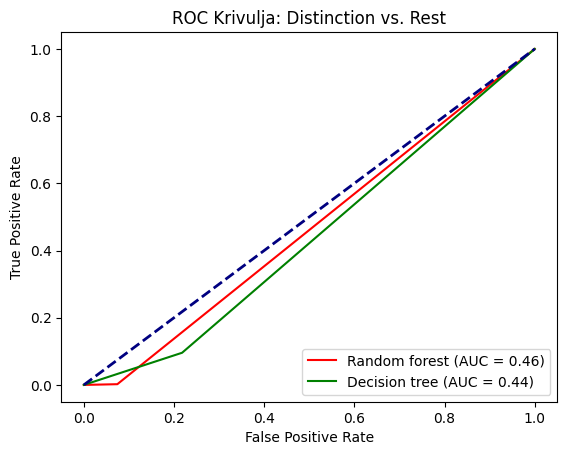

In [89]:
#auc curve for random forest distinction vs. rest
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from scipy import interp

y_test_forest_distinction = label_binarize(y_test_forest['Distinction'], classes=[0, 1])
y_pred_rf_distinction = label_binarize(y_pred_rf[:, 3], classes=[0, 1])

y_test_decision_tree_distinction = label_binarize(y_test_tree['Distinction'], classes=[0, 1])
y_pred_decision_tree_distinction = label_binarize(y_pred[:, 3], classes=[0, 1])

fpr, tpr, _ = roc_curve(y_test_forest_distinction, y_pred_rf_distinction)
roc_auc = auc(fpr, tpr)

fpr2, tpr2, _ = roc_curve(y_test_decision_tree_distinction, y_pred_decision_tree_distinction)
roc_auc2 = auc(fpr2, tpr2)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='red', label='Random forest (AUC = {})'.format(roc_auc.round(2)))
plt.plot(fpr2, tpr2, color='green', label='Decision tree (AUC = {})'.format(roc_auc2.round(2)))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC Krivulja: Distinction vs. Rest')
plt.legend(loc="lower right")
plt.show()



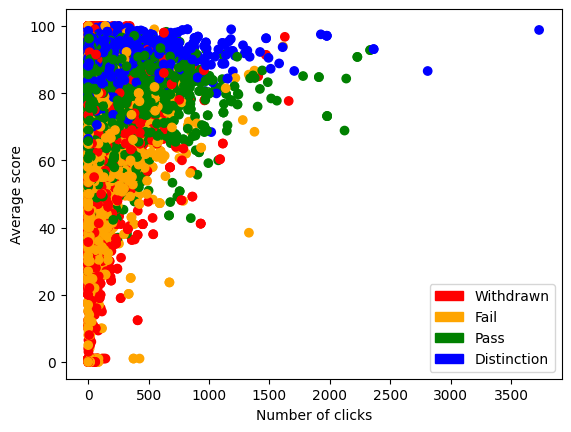

In [90]:
#plot the relationship between number of clicks, average score and final result
import matplotlib.patches as mpatches

red_patch = mpatches.Patch(color='red', label='Withdrawn')
orange_patch = mpatches.Patch(color='orange', label='Fail')
green_patch = mpatches.Patch(color='green', label='Pass')
blue_patch = mpatches.Patch(color='blue', label='Distinction')

plt.scatter(combined_df['sum_click'], combined_df['score'], c=combined_df['final_result'].map({'Withdrawn': 'red', 'Fail': 'orange', 'Pass': 'green', 'Distinction': 'blue'}))
plt.xlabel("Number of clicks")
plt.ylabel("Average score")
plt.legend(handles=[red_patch, orange_patch, green_patch, blue_patch])
plt.show()

# 3. BART

Test 1 - pyopenbt

In [91]:
# from pyopenbt.openbt import OPENBT

# # Test Branin function, rescaled
# def braninsc (xx):
#     x2 = xx[1]
#     x1 = xx[0]
    
#     x1bar = 15 * x1 - 5
#     x2bar = 15 * x2
    
#     import math
#     term1 = x2bar - 5.1*x1bar*2/(4*math.pi*2) + 5*x1bar/math.pi - 6
#     term2 = (10 - 10/(8*math.pi)) * math.cos(x1bar)
    
#     y = (term1**2 + term2 - 44.81) / 51.95
#     return(y)


# # Simulate brain data for testing
# np.random.seed(99)
# n = 500
# p = 2
# x = np.random.uniform(size=n*p).reshape(n,p)
# y = np.zeros(n)
# for i in range(n):
#     y[i] = braninsc(x[i,])
    
# m = OPENBT(model = "bart", tc = 4, modelname = "branin")
# fit = m.fit(x, y)

# # Calculate in-sample predictions
# fitp = m.predict(x, tc = 4)

# # Make a simple plot
# fig = plt.figure(figsize=(16,9)); ax = fig.add_subplot(111)
# ax.plot(y, fitp['mmean'], 'ro')
# ax.set_xlabel("Observed"); ax.set_ylabel("Fitted")
# ax.axline([0, 0], [1, 1])

Test 2 - BartPy

In [92]:
# import sys
# # caution: path[0] is reserved for script path (or '' in REPL)
# # sys.path.insert(1, 'path/to/your/module')
# # sys.path.remove('path/to/your/module')
# print(sys.path)

# from bartpy.bartpy.sklearnmodel import SklearnModel

# model = SklearnModel() # Use default parameters
# model.fit(x, y) # Fit the model
# predictions = model.predict(x) # Make predictions on the train set
# out_of_sample_predictions = model.predict(X_test) # Make predictions on new data


# 4. Logistička regresija

In [93]:
combined_df.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,score,sum_click,date_registration,registration_date_numeric,first_assignment_mark
0,AAA,2013J,11391,1.0,East Anglian Region,0.0,90-100%,2.0,0,240,0.0,Pass,82.0,98.0,-159.0,-159.0,78.0
1,AAA,2013J,28400,0.0,Scotland,0.0,20-30%,1.0,0,60,0.0,Pass,66.4,215.0,-53.0,-53.0,70.0
2,AAA,2013J,31604,0.0,South East Region,2.0,50-60%,1.0,0,60,0.0,Pass,76.0,169.0,-52.0,-52.0,72.0
3,AAA,2013J,32885,0.0,West Midlands Region,1.0,50-60%,0.0,0,60,0.0,Pass,54.4,295.0,-176.0,-176.0,69.0
4,AAA,2013J,38053,1.0,Wales,2.0,80-90%,1.0,0,60,0.0,Pass,68.0,277.0,-110.0,-110.0,79.0


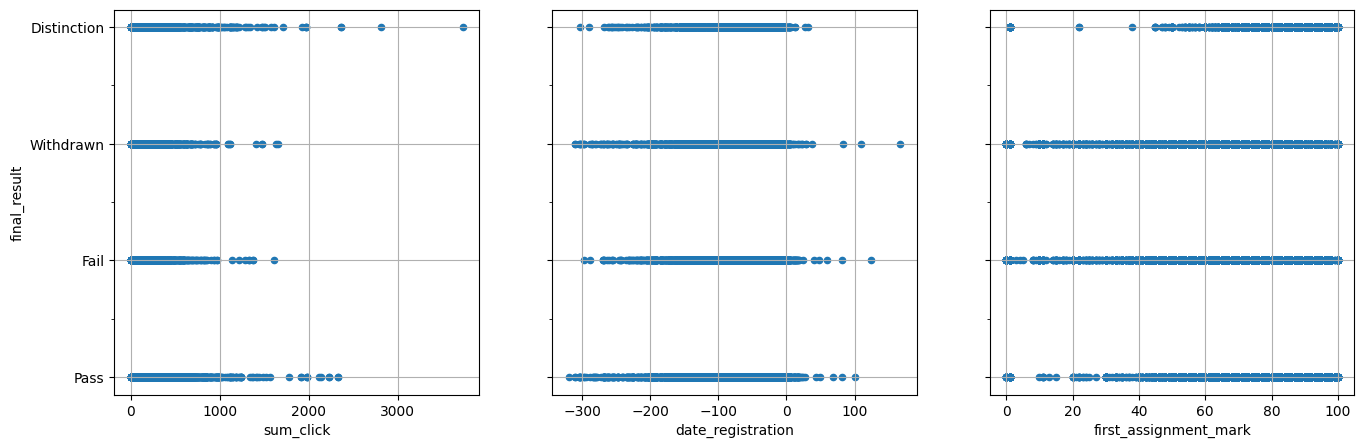

In [94]:
fig, axs = plt.subplots(1, 3, sharey=True)
combined_df.plot(kind='scatter', x='sum_click', y='final_result',
          ax=axs[0], figsize=(16, 5), grid=True)
combined_df.plot(kind='scatter', x='date_registration', y='final_result', ax=axs[1], grid=True)
combined_df.plot(kind='scatter', x='first_assignment_mark', y='final_result', ax=axs[2], grid=True)
plt.show()

In [95]:
from sklearn.calibration import cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


feature_cols = ['sum_click', 'date_registration', 'first_assignment_mark']
X = pd.get_dummies(combined_df[feature_cols])
y = combined_df.final_result

logistic = LogisticRegression()
y_pred = cross_val_predict(logistic, X,  y, cv=10)

print(classification_report(y, y_pred))


              precision    recall  f1-score   support

 Distinction       0.43      0.01      0.02      3018
        Fail       0.40      0.04      0.08      6198
        Pass       0.49      0.95      0.65     12562
   Withdrawn       0.41      0.12      0.19      4912

    accuracy                           0.48     26690
   macro avg       0.43      0.28      0.23     26690
weighted avg       0.45      0.48      0.36     26690



In [96]:
print_confusion_matrix(y, y_pred, ['Withdrawn', 'Fail', 'Pass', 'Distinction'])

             Withdrawn  Fail   Pass  Distinction
Withdrawn           34     9   2898           77
Fail                 4   260   5575          359
Pass                36   109  11975          442
Distinction          5   272   4028          607


# 5. SVM

In [97]:
from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

X = combined_df[['score', 'highest_education', 'sum_click', 'date_registration', 'age_band', 'gender', 'first_assignment_mark']]

y = combined_df['final_result']

# replace all of the 4 unique values with number from 0 to 3
y = y.map({'Withdrawn': 0, 'Fail': 1, 'Pass': 2, 'Distinction': 3})

# split the data into training and testing set
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X, y, test_size=0.3, random_state=42)

# # create a polynomial features object
poly = PolynomialFeatures(degree=2, include_bias=True)
# 
# # fit and transform the training and test data
X_train_svm = poly.fit_transform(X_train_svm)
X_test_svm = poly.transform(X_test_svm)

# scale the data
scaler = StandardScaler()
X_train_svm_scaled = scaler.fit_transform(X_train_svm)
X_test_svm_scaled = scaler.transform(X_test_svm)

svc = LinearSVC()
# we want to 
svc.fit(X_train_svm_scaled, y_train_svm)

y_pred_svm = np.array(svc.predict(X_test_svm_scaled))
y_test_svm = np.array(y_test_svm)

y_values = [0, 1, 2, 3]
class_name = {0: 'Withdrawn', 1: 'Fail', 2: 'Pass', 3: 'Distinction'}

# I want to dispaly the accuracy for each class

for i in y_values:
    print("Class: ", class_name[i])
    print("Precision:", precision_score(y_test_svm, y_pred_svm, labels=[i], average='weighted', zero_division=0).round(2))
    print("F1:", f1_score(y_test_svm, y_pred_svm, labels=[i], average='weighted', zero_division=0).round(2))
    print("Recall:", recall_score(y_test_svm, y_pred_svm, labels=[i], average='weighted', zero_division=0).round(2))
    class_accuracy = accuracy_score(y_test_svm[y_test_svm == i], y_pred_svm[y_test_svm == i])
    print("Accuracy:", class_accuracy.round(2))
    print()

Class:  Withdrawn
Precision: 0.51
F1: 0.18
Recall: 0.11
Accuracy: 0.11

Class:  Fail
Precision: 0.52
F1: 0.38
Recall: 0.3
Accuracy: 0.3

Class:  Pass
Precision: 0.56
F1: 0.69
Recall: 0.91
Accuracy: 0.91

Class:  Distinction
Precision: 0.58
F1: 0.41
Recall: 0.31
Accuracy: 0.31

